In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from object_classifier.detect import ObjectClassifier
import cv2
from moving_object_detection.moving_object_detector import MovingObjectDetector
import matplotlib.pyplot as plt
from object_classifier.classified_object import get_image_with_bbx
from object_merger import ObjectMerger

In [3]:
cap = cv2.VideoCapture("./data/videos/cars.mp4")

# print(cap.get(cv2.CAP_PROP_FPS))
_, first_frame = cap.read()
_, second_frame = cap.read()
_, third_frame = cap.read()

mod = MovingObjectDetector()
obc = ObjectClassifier()

mod.run(first_frame)
mod.run(second_frame)
mod_obj = mod.area_threshold
mod_image = mod.get_image_with_bounding_boxes(second_frame)

det = obc.run(second_frame)
img = get_image_with_bbx(det, second_frame)
plt.imshow(mod_image)
plt.show()
plt.imshow(img)

Using CPU



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   169    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (22) The requested URL returned error: 404


FileNotFoundError: [Errno 2] No such file or directory: './object_classifier/weights/best.pt'

[ClassifiedObject(1006.0,376.0), ClassifiedObject(1104.0,329.0), ClassifiedObject(1006.0,376.0), ClassifiedObject(680.0,420.0), ClassifiedObject(761.0,488.0), ClassifiedObject(921.0,660.0), ClassifiedObject(1357.0,564.0), ClassifiedObject(1029.0,964.0)]


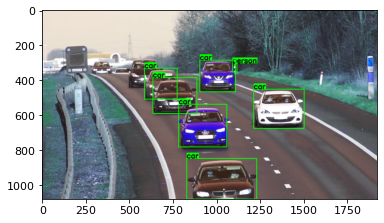

In [34]:
merger = ObjectMerger()
merger.merge_objects(mod.moving_objects, det)
print(merger.moving_classified_objects)
filter = get_image_with_bbx(merger.moving_classified_objects, second_frame)
plt.imshow(filter)